<a href="https://colab.research.google.com/github/delacortejm/coder_ds1/blob/main/ProyectoDS_ParteI_DeLaCorteJuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESUMEN
Este conjunto de datos contiene información sobre las experiencias de los empleados con el trabajo remoto, en diversas industrias y países. El análisis está enfocado en evaluar el impacto de estas modalidades laborales en su salud mental y bienestar general. La muestra incluye 5,000 participantes, considerando sus características personales, posiciones laborales y ubicaciones. En total, se analizan 19 variables clave.

Variables incluidas en el estudio
Características del empleado: edad, género y ubicación.
Detalles del puesto de trabajo: rol desempeñado, años de experiencia y ubicación geográfica del empleo.
Aspectos de salud y bienestar: puntuaciones de equilibrio entre vida laboral y personal, niveles de estrés, calidad del sueño, frecuencia de actividad física y estado de salud mental. También se incluyen indicadores relacionados con el apoyo que las empresas brindan a los empleados en el contexto del trabajo remoto.

HIPOTESIS
¿Existe una relación entre la edad y los niveles de estrés? Específicamente, ¿los empleados más jóvenes presentan niveles más altos de estrés? Si es así, ¿podría estar vinculado a su menor experiencia laboral?
¿El trabajo remoto resulta más estresante que otros tipos de empleo? De ser cierto, ¿podría atribuirse al aislamiento social asociado a esta modalidad?
¿Las personas que trabajan de forma remota tienden a tener jornadas laborales más cortas?

OBJETIVO
El objetivo principal de este análisis es comprender cómo el trabajo remoto influye en la vida de los empleados. Los resultados podrían ser una base valiosa para destacar los beneficios del trabajo remoto en términos de productividad, bienestar físico y salud mental, fomentando su implementación en el entorno laboral.

In [11]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# función para importar archivos de drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
file_path =  '/content/drive/MyDrive/Coderhouse - Data Science path/2. DS 1/Entregable 1/03 - Impact_of_Remote_Work_on_Mental_Health.xlsx
df = pd.read_excel(file_path)
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Graduation_Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,2,Depression,No,Decrease,1,Satisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,2,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,2,Anxiety,No,No Change,4,Satisfied,5,NaN,Poor,North America
3,EMP0323,32,Male,Marketing,IT,1,Onsite,58,0,3,...,3,Anxiety,Yes,Decrease,4,Unsatisfied,5,NaN,Poor,Asia
4,EMP0459,53,Male,Marketing,IT,1,Onsite,42,14,3,...,3,Depression,No,No Change,1,Unsatisfied,3,Daily,Poor,Asia


In [16]:
df['Stress_Level'].value_counts(dropna=False)

,count
Stress_Level,
Low,2679
High,1623
Medium,698


In [17]:
df['Region'].value_counts(dropna=False)

,count
Region,
Oceania,867
Africa,860
Europe,840
Asia,829
South America,827
North America,777


In [18]:
df['Gender'].value_counts(dropna=False)

,count
Gender,
Male,2892
Female,2103
Non-binary,5


In [19]:
df['Industry'].value_counts(dropna=False)

,count
Industry,
IT,1446
Finance,1118
Education,559
Healthcare,542
Retail,486
Manufacturing,466
Consulting,383


In [20]:
df['Work_Location'].value_counts(dropna=False)

,count
Work_Location,
Remote,1714
Hybrid,1649
Onsite,1637


In [21]:
# Descripción de las características del Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Graduation_Stress_Level            5000 non-null   int64 
 12  Mental

In [22]:
df["Gender"]= df.Gender.astype("category")
df["Industry"]= df["Industry"].astype("category")
df["Work_Location"]= df["Work_Location"].astype("category")
df["Stress_Level"]=df["Stress_Level"].astype("category")

In [23]:
df.describe(include="category")

,Gender,Industry,Work_Location,Stress_Level
count,5000,5000,5000,5000
unique,3,7,3,3
top,Male,IT,Remote,Low
freq,2892,1446,1714,2679


In [24]:
df['Physical_Activity'].value_counts(dropna=False)

,count
Physical_Activity,
Weekly,1755
NaN,1629
Daily,1616


In [25]:
df['Mental_Health_Condition'].value_counts(dropna=False)

,count
Mental_Health_Condition,
Burnout,1280
Anxiety,1278
Depression,1246
NaN,1196


Manipulación de faltantes
En el Dataset existen dos variables con respuestas nulas:

Mental_Health_Condition: Considerando esta variable, que habla sobre si la persona posee una Condición Mental, interpreto que las filas nulas referencian a que el encuestado no posee ninguna condición mental en particular, por lo cual, rellernaré los datos faltantes con la palabra "Ninguna"
Physical_Activity: Considerando que esta variable hace referencia a la cotidianeidad con la cual la persona realiza actividad física, interpreto que los datos nulos hacen referencia a que no realizan ninguna actividad, entonces, reemplazaré los nulos por "No realiza actividad física"

In [26]:
df['Physical_Activity'] = df['Physical_Activity'].fillna('No realiza actividad física')
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('Ninguna')

In [27]:
df['Physical_Activity'].value_counts(dropna=False)

,count
Physical_Activity,
Weekly,1755
No realiza actividad física,1629
Daily,1616


In [28]:
df['Mental_Health_Condition'].value_counts(dropna=False)

,count
Mental_Health_Condition,
Burnout,1280
Anxiety,1278
Depression,1246
Ninguna,1196


In [29]:
df.describe().round(2)


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Graduation_Stress_Level,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,41.0,17.81,41.10,7.56,2.98,1.79,2.99,3.01
std,11.3,10.02,11.29,4.64,1.41,0.90,1.39,1.40
min,22.0,1.00,20.00,0.00,1.00,1.00,1.00,1.00
25%,31.0,9.00,31.00,4.00,2.00,1.00,2.00,2.00
50%,41.0,18.00,44.00,8.00,3.00,1.00,3.00,3.00
75%,51.0,26.00,48.00,12.00,4.00,3.00,4.00,4.00
max,60.0,35.00,60.00,15.00,5.00,3.00,5.00,5.00


In [30]:
print(df['Age'].mean())
print(df['Age'].median())


40.995
41.0


In [31]:
df.Mental_Health_Condition.value_counts()

,count
Mental_Health_Condition,
Burnout,1280
Anxiety,1278
Depression,1246
Ninguna,1196


In [32]:
#Cálculo la desviación estandar.

df['Age'].std()

11.296021203016728

Text(0, 0.5, 'Frecuencias')

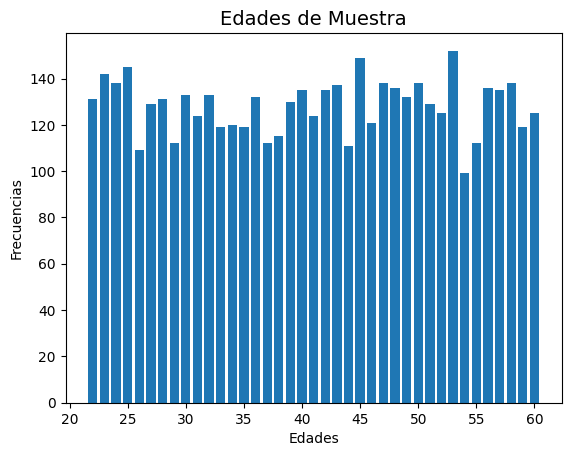

In [35]:
edades = df['Age'].value_counts().index
frecuencias = df['Age'].value_counts().values
plt.bar(edades, frecuencias)
plt.title('Edades de Muestra', size=14)
plt.xlabel('Edades')
plt.ylabel('Frecuencias')

#Este gráfico me permite ver la dispersión de Edades que hay en la muestra analizada

<ipython-input-36-acccbce75e2e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_work_location = df.groupby(['Region', 'Work_Location'])['Work_Location'].count().unstack()


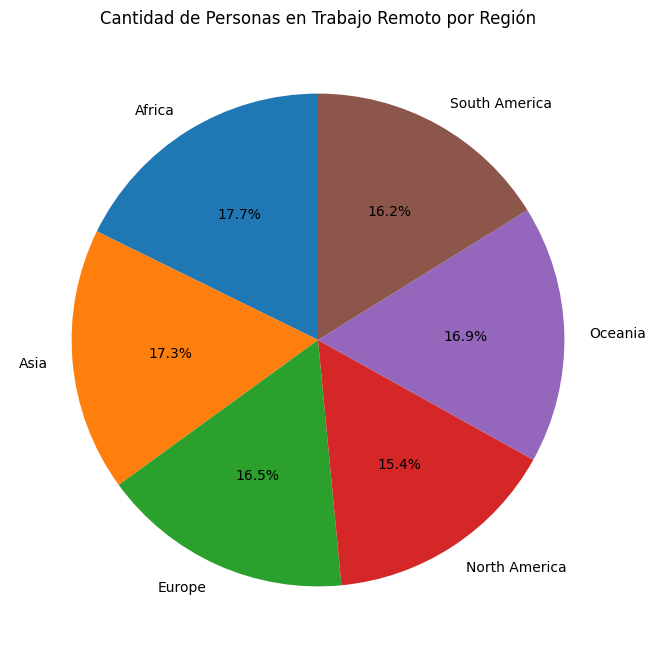

In [36]:
region_work_location = df.groupby(['Region', 'Work_Location'])['Work_Location'].count().unstack()
remote_work_by_region = region_work_location['Remote']
plt.figure(figsize=(8, 8))
plt.pie(remote_work_by_region, labels=remote_work_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Cantidad de Personas en Trabajo Remoto por Región')
plt.show()

<ipython-input-37-2d200787fc3f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_work_location = df.groupby(['Region', 'Work_Location'])['Work_Location'].count().unstack()


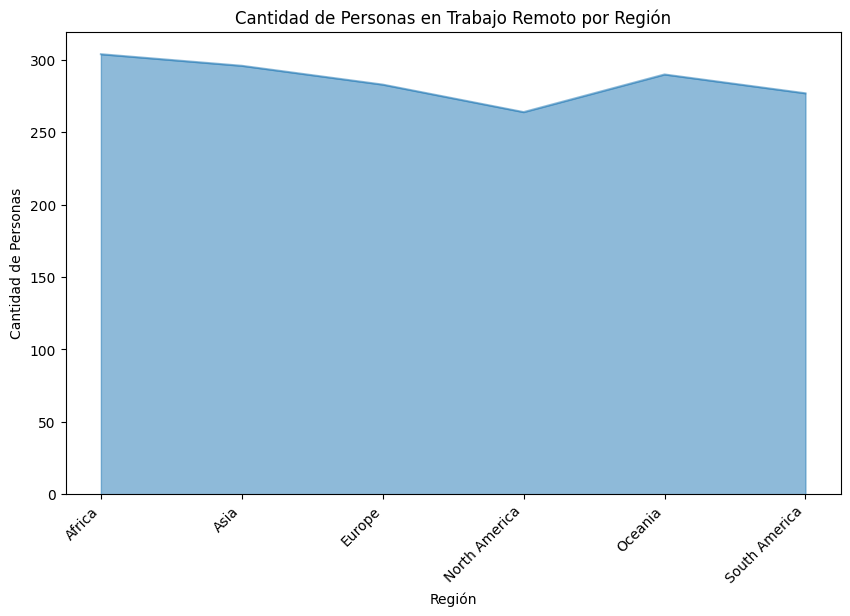

In [37]:
region_work_location = df.groupby(['Region', 'Work_Location'])['Work_Location'].count().unstack()
remote_work_by_region = region_work_location['Remote']

plt.figure(figsize=(10, 6))
remote_work_by_region.plot.area(stacked=False)

plt.title('Cantidad de Personas en Trabajo Remoto por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Personas')


plt.xticks(rotation=45, ha='right')

plt.show()


In [38]:
#Con estos dos gráficos puedo ver que la muestra considera tanto las posiciones remotas como las posiciones hibridas en proporciones similares por región.

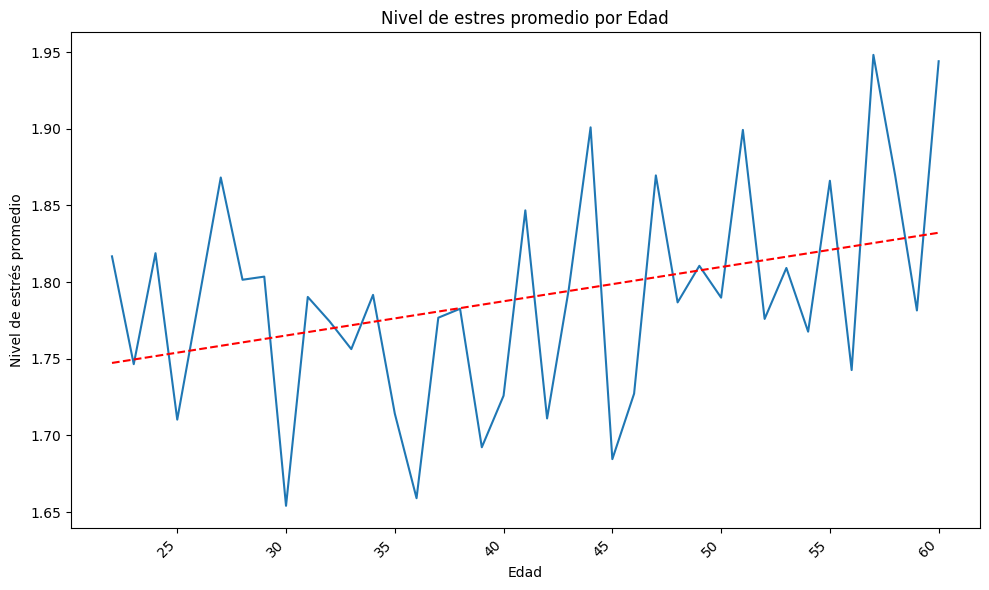

In [39]:
avg_stress_by_experience = df.groupby('Age')['Graduation_Stress_Level'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_stress_by_experience.index, avg_stress_by_experience.values)
plt.title('Nivel de estres promedio por Edad')
plt.xlabel('Edad')
plt.ylabel('Nivel de estrés promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
z = np.polyfit(avg_stress_by_experience.index, avg_stress_by_experience.values, 1)
p = np.poly1d(z)
plt.plot(avg_stress_by_experience.index, p(avg_stress_by_experience.index), "r--")
plt.tight_layout()
plt.show()
plt.show()

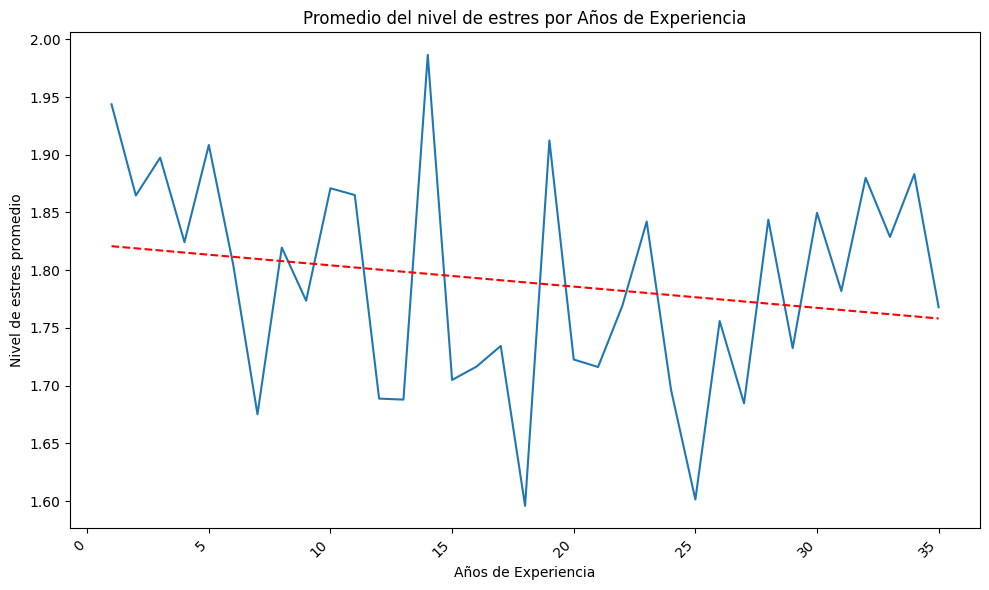

In [40]:
avg_stress_by_experience = df.groupby('Years_of_Experience')['Graduation_Stress_Level'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_stress_by_experience.index, avg_stress_by_experience.values)
plt.title('Promedio del nivel de estres por Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Nivel de estres promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
z = np.polyfit(avg_stress_by_experience.index, avg_stress_by_experience.values, 1)
p = np.poly1d(z)
plt.plot(avg_stress_by_experience.index, p(avg_stress_by_experience.index), "r--")
plt.tight_layout()
plt.show()
plt.show()


In [41]:
#De acuerdo a estos gráficos, si bien los niveles de estres promedio aumentan con la edad, estos niveles de estrés se reducen a medida que aumentan los años de experiencia.

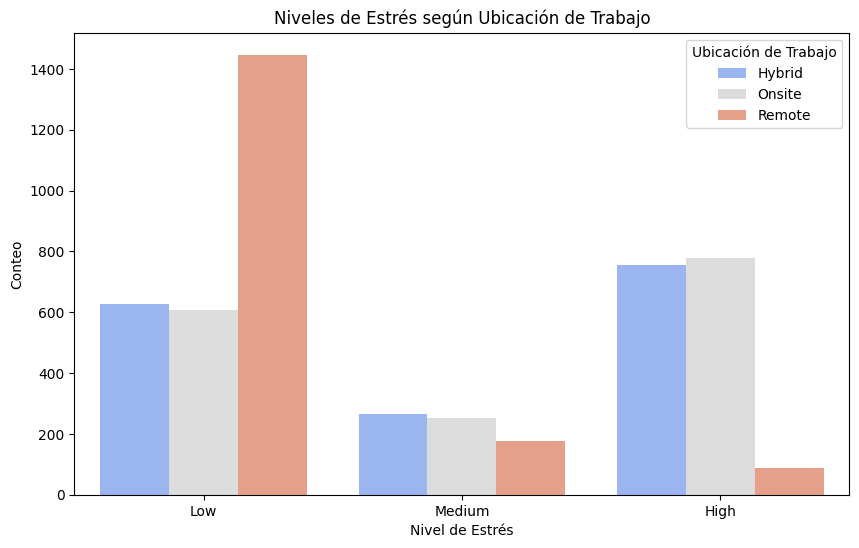

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress_Level', hue='Work_Location', palette='coolwarm', order=['Low', 'Medium', 'High'])
plt.title('Niveles de Estrés según Ubicación de Trabajo')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Conteo')
plt.legend(title='Ubicación de Trabajo')
plt.show()

#Este gráfico me permite ver el nivel de estres en los distintas modalidades de trabajo (Remoto, híbrida y onsite). De acuerdo a este gráfico, las personas con trabajo remoto sufren menos estres que en otro tipo de trabajos.


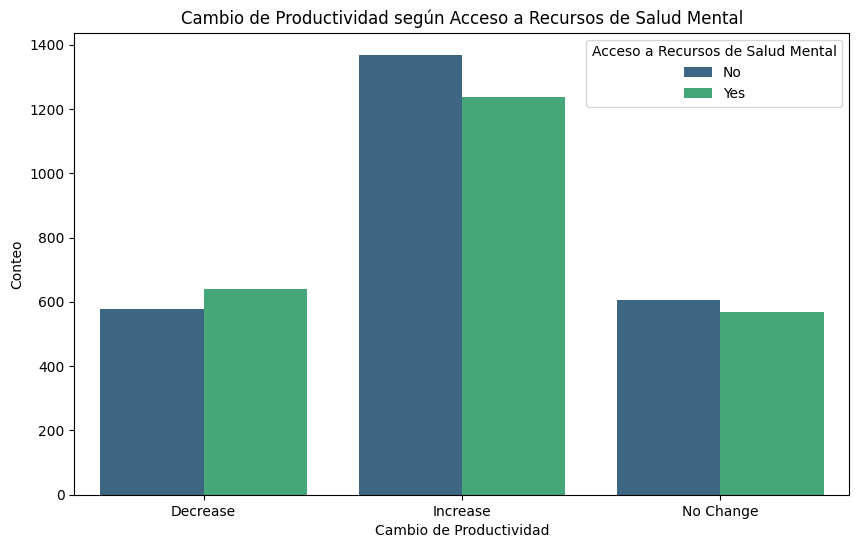

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Productivity_Change', hue='Access_to_Mental_Health_Resources', palette='viridis')
plt.title('Cambio de Productividad según Acceso a Recursos de Salud Mental')
plt.xlabel('Cambio de Productividad')
plt.ylabel('Conteo')
plt.legend(title='Acceso a Recursos de Salud Mental')
plt.show()

#Según este gráfico, si bien las diferencias son pequeñas, podría decirse que son más productivas o menos improductivas aquellas personas que tienen acceso a recursos de salud mental.

<ipython-input-45-b548090eb26e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(['Industry', 'Graduation_Stress_Level']).size().reset_index(name='count')
<ipython-input-45-b548090eb26e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = count_data.groupby('Industry')['count'].transform('sum')


<Figure size 1200x800 with 0 Axes>

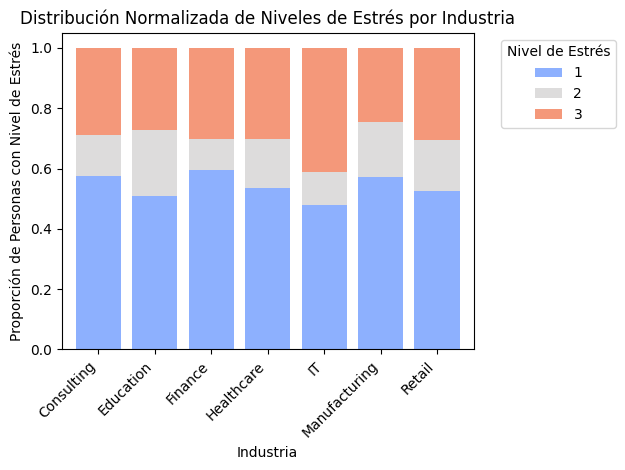

In [45]:
count_data = df.groupby(['Industry', 'Graduation_Stress_Level']).size().reset_index(name='count')
total_counts = count_data.groupby('Industry')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_counts
pivot_data = count_data.pivot(index='Industry', columns='Graduation_Stress_Level', values='percentage').fillna(0)
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, color=sns.color_palette('coolwarm', len(pivot_data.columns)), width=0.8)
plt.title('Distribución Normalizada de Niveles de Estrés por Industria')
plt.xlabel('Industria')
plt.ylabel('Proporción de Personas con Nivel de Estrés')
plt.legend(title='Nivel de Estrés', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Según este gráfico, a grandes rasgos se mantienen los mismas proporciones niveles de estres entre las distintas industrias, pero se puede notar que en la industria IT las personas sufren más estres.